
# Project: Investigate TMDb movie data- Part 3

## Table of Contents
<ul>
<li><a href="#intro">I) Introduction</a></li>
<li><a href="#wrangling">II) Data Wrangling</a></li>
<li><a href="#eda">III) Exploratory Data Analysis & Relevant Conclusions</a></li>
</ul>

## <a id='intro'></a>
## I) Introduction

> This is the part-3 of the report analyzing the TMDB 500 movies dataset. Questions related to the producer, production company, the cast will be analyzed in this part. Also, the top 500 movies with the highest vote and a summary conclusion will be made with the observations after each section.            
           

### Questions:


           
### 6. Producer, Production House and Actor
                        
  
**A) Who are the 10 most frequent Casts?**

**B) What is the most frequent Genre?**

**C) Which Production company released the highest amount of movies?**
             
**D) What is the largest number of the movie by a single producer?**

**E) What is the highest amount of profit made by a movie?**

### 7. Top 500 Movies based on Vote Average:
               

**A) Among the top 500 movies, what is the most frequent genre and what is the vote_average  for that genre?**

**B) In which quarter of the year most of the top 500 movies were released?**

**C) Which decade has most movies among the top 500 movies were released?**

**D) Which cast appears the largest number of times in most of the top 500 movies were released?**

**E) Of the top 500 movies who has produced the largest number of movies?**

**F) Of the top 500 movies, which single month of a particular decade has the highest amount of movie released?**

          

<a id='wrangling'></a>
## II) Data Wrangling



In [1]:
# Importing packages and reading the CSV file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

%matplotlib inline

df_movies = pd.read_csv('C:\\Users\\raz37388\\Desktop\\Udacity_assignment\\Assignment 2\\tmdb-movies.csv') 


### Data properties

In [2]:
# view dimensions of dataset
df_movies.shape

(10866, 21)

### Drop Extraneous Columns


In [3]:
# check column names
df_movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08


In [4]:
# drop columns from the dataset that will not be used during the analysis
df_movies.drop(['id', 'imdb_id', 'popularity', 'homepage', 'tagline', 'overview',  'vote_count',  'budget_adj', 'revenue_adj'], axis = 1, inplace= True)

In [5]:
# confirm changes- the dropped columns will not appear
df_movies.head(1)

,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015


In [6]:
# confirm changes- should return the remaining columns
df_movies.shape

(10866, 12)

In [7]:
# view missing value count for each feature of the dataset
df_movies.isnull().sum()

budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_average               0
release_year               0
dtype: int64

In [8]:
# find duplicate 
df_movies[df_movies.duplicated()]

,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year
2090,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/2010,5.0,2010


In [9]:
#dropping the duplicate 
df_movies.drop_duplicates(inplace=True)

In [10]:
# CHecking for the duplicate- should return False 
df_movies.duplicated().any()

False

In [11]:
# See the summary of the data 
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.1+ MB


### III) Exploratiory Data Analysis and Relevant Conclusion

### 6- A) Who are the 10 most frequent Casts?
                

In [12]:
# counts  the number of elements in a list and and returns the most frequent 10
def list_counter(x):
    from collections import Counter
    return Counter(x).most_common(10)

In [13]:
def frequent_names(df_column):
    ### input: take a dataframe column as input
    ### concatnate all the elements and then split it into a list of strings
    ### count the top 10 strings with list counter function
    ### output: a list with the top 10 elements
    
    str_list = df_column.str.cat(sep='|').split('|')
    return list_counter(str_list)

In [14]:
# finding the top 10 cast
frequent_10_cast = frequent_names(df_movies['cast'])

In [15]:
# finding the top 10 cast with their number of movies
frequent_10_cast

[('Robert De Niro', 72),
 ('Samuel L. Jackson', 71),
 ('Bruce Willis', 62),
 ('Nicolas Cage', 61),
 ('Michael Caine', 53),
 ('Robin Williams', 51),
 ('John Cusack', 50),
 ('John Goodman', 49),
 ('Morgan Freeman', 49),
 ('Liam Neeson', 48)]

In [16]:
#counting the numner of original titles  
df_movies[df_movies['cast'].str.contains("Robert De Niro")==True].original_title.count()

72

### 6-B)  What is the most frequent Genre?
               

In [17]:
# frquent 10 movie genres
frequent_10_genres = frequent_names(df_movies['genres'])

In [18]:
# values of frquent 10 movie genres
frequent_10_genres

[('Drama', 4760),
 ('Comedy', 3793),
 ('Thriller', 2907),
 ('Action', 2384),
 ('Romance', 1712),
 ('Horror', 1637),
 ('Adventure', 1471),
 ('Crime', 1354),
 ('Family', 1231),
 ('Science Fiction', 1229)]

In [19]:
#converting the frequent 10 genres into a dataframe
df_frequent_genres =  pd.DataFrame(frequent_10_genres,columns = ['genres', 'no_of_movies'])

In [20]:
# frequent 10 genres dataframe
df_frequent_genres

,genres,no_of_movies
0,Drama,4760
1,Comedy,3793
2,Thriller,2907
3,Action,2384
4,Romance,1712
5,Horror,1637
6,Adventure,1471
7,Crime,1354
8,Family,1231
9,Science Fiction,1229


In [21]:
df_movies.shape[0]

10865

In [22]:
# Percante of frequent Genres:
df_frequent_genres['percentage'] =  df_frequent_genres['no_of_movies']/df_movies.shape[0]*100

In [23]:
# Percante of frequent Genres:
df_frequent_genres

,genres,no_of_movies,percentage
0,Drama,4760,43.810400
1,Comedy,3793,34.910262
2,Thriller,2907,26.755637
3,Action,2384,21.942016
4,Romance,1712,15.757018
5,Horror,1637,15.066728
6,Adventure,1471,13.538886
7,Crime,1354,12.462034
8,Family,1231,11.329959
9,Science Fiction,1229,11.311551


### Note: 

**1. It is important to note that, one movie can be categorized as a combination of multiple genres. Hence, the addition of no_of_movies (and the percentage) supercedes the total number of movies.** 

**2. The percentage here indicates how many percentages of the total movies have a particular genre mentioned as a part of the genre description.**

###  6-C) Which Production company released the highest amount of movies?
                

In [24]:
# top 10 production companies
top10_production_companies = frequent_names(df_movies['production_companies'])

In [25]:
# top 10 production companies
top10_production_companies

[('Universal Pictures', 522),
 ('Warner Bros.', 509),
 ('Paramount Pictures', 431),
 ('Twentieth Century Fox Film Corporation', 282),
 ('Columbia Pictures', 272),
 ('New Line Cinema', 219),
 ('Metro-Goldwyn-Mayer (MGM)', 218),
 ('Walt Disney Pictures', 214),
 ('Touchstone Pictures', 178),
 ('Columbia Pictures Corporation', 160)]

In [26]:
#converting the top 10 production companies into a dataframe
df_top10_production_companies =  pd.DataFrame(top10_production_companies,columns = ['production_company', 'no_of_movies'])

In [27]:
#Top 10 production company
df_top10_production_companies

,production_company,no_of_movies
0,Universal Pictures,522
1,Warner Bros.,509
2,Paramount Pictures,431
3,Twentieth Century Fox Film Corporation,282
4,Columbia Pictures,272
5,New Line Cinema,219
6,Metro-Goldwyn-Mayer (MGM),218
7,Walt Disney Pictures,214
8,Touchstone Pictures,178
9,Columbia Pictures Corporation,160


### 6-D) What is the largest number of the movie by a single producer?
 

In [28]:
# top 10 production companies
top10_producers = frequent_names(df_movies['director'])

In [29]:
# 10 most frequent producers
top10_producers

[('Woody Allen', 46),
 ('Clint Eastwood', 34),
 ('Martin Scorsese', 31),
 ('Steven Spielberg', 30),
 ('Ridley Scott', 23),
 ('Steven Soderbergh', 23),
 ('Ron Howard', 22),
 ('Joel Schumacher', 21),
 ('Tim Burton', 20),
 ('Brian De Palma', 20)]

In [30]:
# average rating for the Woody Allen movies
df_movies[df_movies['director'].str.contains("Woody Allen")==True].vote_average.mean()


6.430434782608694

In [31]:
# Max average rating for the Woody Allen movies
df_movies[df_movies['director'].str.contains("Woody Allen")==True].vote_average.max()

7.7

In [32]:
# Minimum average rating for the Woody Allen movies
df_movies[df_movies['director'].str.contains("Woody Allen")==True].vote_average.min()

5.4

### 6-E) What is the highest amount of profit made by a movie?
                
                

In [33]:
# Converting the budget and revenue in million USD
df_movies['budget']= df_movies['budget']/10**6
df_movies['revenue']= df_movies['revenue']/10**6

In [34]:
#Calcuating profit by subtucting budget from revenue
df_movies['profit'] = df_movies['revenue']- df_movies['budget']

In [35]:
# Top 3 movies with largest amount of profit
df_movies.nlargest(3,'profit')

,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,profit
1386,237.0,2781.505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/2009,7.1,2009,2544.505847
3,200.0,2068.178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,7.5,2015,1868.178225
5231,200.0,1845.034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/1997,7.3,1997,1645.034188


### 6. Conclusions

**A) Robert De Niro is the most frequent cast and he has appeared for 72 movies.** 

**B) Comedy and the Drama are the most common genre description of the movies.**

**C) Universal Picture has released the largest number of movies - a total of 522.**

**D) Woody Allen has produced the highest number of 46 movies, and the average vote rating for his movies is 6.43. Maximum vote_average of his movie is 7.7 and the minimum is 5.4.**

**E) 'Avatar' by James Cameron made the largest amount of profit- and as mentioned by the wiki-"Avatar" is also the world's highest-grossing film of all time (Source Ref-1).**


###  7. Top 500 Movies with highest Vote Average

For this part of the project, we will foucs on the top 500 movies with the highest vote average. 
               
               



In [36]:
#top 500 movies with highest vote_average
df_top500 = df_movies.nlargest(500, 'vote_average')

In [37]:
#View the top 500 movies with highest vote_average
df_top500.head(2)

,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,profit
3894,0.0,0.0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,cinema|nouvelle vague|hindi cinema|cinema novo...,900,Documentary,NaN,9/3/2011,9.2,2011,0.0
538,0.0,0.0,The Mask You Live In,NaN,Jennifer Siebel Newsom,feminism|sexism|young boy|gender roles|misogyny,88,Documentary,NaN,1/1/2015,8.9,2015,0.0


In [38]:
# Creates bin edges for each decade
bin_edges = [1959, 1969, 1979, 1989, 1999, 2009, 2019 ]

In [39]:
# Creates bin names based on the decades
bin_names = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s' ]

In [40]:
# Creates decade_levels column based on the year of release
df_top500['decade'] = pd.cut(df_movies['release_year'], bin_edges, labels = bin_names)

In [41]:
#View the top 500 movies with decade column
df_top500.head(2)

,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,profit,decade
3894,0.0,0.0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,cinema|nouvelle vague|hindi cinema|cinema novo...,900,Documentary,NaN,9/3/2011,9.2,2011,0.0,2010s
538,0.0,0.0,The Mask You Live In,NaN,Jennifer Siebel Newsom,feminism|sexism|young boy|gender roles|misogyny,88,Documentary,NaN,1/1/2015,8.9,2015,0.0,2010s


In [42]:
#Overview of the data 
df_top500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 3894 to 1926
Data columns (total 14 columns):
budget                  500 non-null float64
revenue                 500 non-null float64
original_title          500 non-null object
cast                    479 non-null object
director                486 non-null object
keywords                421 non-null object
runtime                 500 non-null int64
genres                  495 non-null object
production_companies    409 non-null object
release_date            500 non-null object
vote_average            500 non-null float64
release_year            500 non-null int64
profit                  500 non-null float64
decade                  500 non-null category
dtypes: category(1), float64(4), int64(2), object(7)
memory usage: 55.4+ KB


In [43]:
#Summary the top 500 movie data 
df_top500.describe()

,budget,revenue,runtime,vote_average,release_year,profit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,17.632674,94.220306,110.916000,7.737200,2003.512000,76.587631
std,42.698861,234.407522,73.272961,0.275259,13.437671,199.268617
min,0.000000,0.000000,0.000000,7.400000,1960.000000,-120.000000
25%,0.000000,0.000000,88.000000,7.500000,1998.000000,0.000000
50%,0.000000,0.000000,104.000000,7.700000,2009.000000,0.000000
75%,13.625000,47.399149,130.000000,7.900000,2013.000000,35.106527
max,280.000000,2068.178225,900.000000,9.200000,2015.000000,1868.178225


### 7- A) Among the top 500 movies, what is the most frequent genre and what is the vote_average  for that genre?
              

In [44]:
# frquent 10 movie genres
top10_gen = frequent_names(df_top500['genres'])

In [45]:
# Most frequent 10 genres
top10_gen

[('Drama', 211),
 ('Documentary', 131),
 ('Comedy', 105),
 ('Action', 66),
 ('Adventure', 61),
 ('Animation', 61),
 ('Thriller', 57),
 ('Crime', 56),
 ('Science Fiction', 51),
 ('Music', 51)]

In [46]:
# Average rating for the Drama genre among the topc 500 movies 
df_top500[df_top500['genres'].str.contains("Drama")==True].vote_average.mean()

7.6976303317535635

In [47]:
# Average rating for the Drama among the topc 500 movies 
df_top500[df_top500['genres'].str.contains("Documentary")==True].vote_average.mean()

7.801526717557256

In [48]:
# Average rating for the Comedy genre among the topc 500 movies 
df_top500[df_top500['genres'].str.contains("Comedy")==True].vote_average.mean()

7.697142857142861

In [49]:
# Average rating for the Action genre among the topc 500 movies 
df_top500[df_top500['genres'].str.contains("Action")==True].vote_average.mean()

7.643939393939392

### Conclucion 7-A)

**Like the total movie dataset, the drama is also the most frequent genres mentioned in the genre description of the top 500 movies with a voter average of 7.69. Documentary ranks second, but the documentaries have a higher vote_average rating of 7.8.**

### 7- B) In which quarter of the year most of the top 500 movies were released?
                
               

In [50]:
df_top500.head(3)

,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,profit,decade
3894,0.0,0.0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,cinema|nouvelle vague|hindi cinema|cinema novo...,900,Documentary,NaN,9/3/2011,9.2,2011,0.0,2010s
538,0.0,0.0,The Mask You Live In,NaN,Jennifer Siebel Newsom,feminism|sexism|young boy|gender roles|misogyny,88,Documentary,NaN,1/1/2015,8.9,2015,0.0,2010s
1200,0.0,0.0,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,Carl Tibbetts,artificial intelligence|confession|technology|...,74,Drama|Horror|Mystery|Science Fiction|Thriller,NaN,12/16/2014,8.8,2014,0.0,2010s


In [51]:
#Converting release_date into datetime format
df_top500['release_date']= pd.to_datetime(df_top500.release_date)

In [52]:
#Checking the release_date conversion into datetime format
df_top500.head(5)

,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,profit,decade
3894,0.0,0.0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,cinema|nouvelle vague|hindi cinema|cinema novo...,900,Documentary,NaN,2011-09-03,9.2,2011,0.0,2010s
538,0.0,0.0,The Mask You Live In,NaN,Jennifer Siebel Newsom,feminism|sexism|young boy|gender roles|misogyny,88,Documentary,NaN,2015-01-01,8.9,2015,0.0,2010s
1200,0.0,0.0,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,Carl Tibbetts,artificial intelligence|confession|technology|...,74,Drama|Horror|Mystery|Science Fiction|Thriller,NaN,2014-12-16,8.8,2014,0.0,2010s
2269,0.0,0.0,Life Cycles,NaN,Derek Frankowski,sport|cycling,47,Documentary,NaN,2010-10-02,8.8,2010,0.0,2010s
6911,0.0,0.0,Pink Floyd: Pulse,David Gilmour|Nick Mason|Richard Wright|Sam Br...,David Mallet,live concert,145,Music,SMV Enterprises|Columbia Music Video|EMI,2006-07-09,8.7,2006,0.0,2000s


In [53]:
#Extracting the Month from the release_date 
df_top500['Month'] = df_top500['release_date'].dt.month

In [54]:
# Calculating the number of movie release per month
df_top500_per_month = df_top500['Month'].value_counts()

In [55]:
# The number of movie release per month
df_top500_per_month

12    72
9     66
10    60
6     48
1     48
11    39
7     34
8     31
5     30
3     28
2     25
4     19
Name: Month, dtype: int64

In [56]:
# Total number of movies- should release 500 as all the top 500 movies has release date
df_top500_per_month.sum()

500

In [57]:
# Creating the Month-name category 
df_top500['Month-str'] = df_top500['release_date'].dt.strftime('%b')

In [58]:
# Observe the Month-name category 
df_top500.head(2)

,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,profit,decade,Month,Month-str
3894,0.0,0.0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,cinema|nouvelle vague|hindi cinema|cinema novo...,900,Documentary,NaN,2011-09-03,9.2,2011,0.0,2010s,9,Sep
538,0.0,0.0,The Mask You Live In,NaN,Jennifer Siebel Newsom,feminism|sexism|young boy|gender roles|misogyny,88,Documentary,NaN,2015-01-01,8.9,2015,0.0,2010s,1,Jan


In [59]:
df_top500_year_count = df_top500['release_year'].value_counts()

In [60]:
#Counting the number of movies per month
df_top500_month_count = df_top500['Month-str'].value_counts()

In [61]:
# Nmber of movies per month
df_top500_month_count

Dec    72
Sep    66
Oct    60
Jan    48
Jun    48
Nov    39
Jul    34
Aug    31
May    30
Mar    28
Feb    25
Apr    19
Name: Month-str, dtype: int64

In [62]:
# Counting the total number- should be 500
df_top500_month_count.sum()

500

In [63]:
# percentage of top 500 movies released per month
df_top500_month_count/ df_top500_month_count.sum()*100

Dec    14.4
Sep    13.2
Oct    12.0
Jan     9.6
Jun     9.6
Nov     7.8
Jul     6.8
Aug     6.2
May     6.0
Mar     5.6
Feb     5.0
Apr     3.8
Name: Month-str, dtype: float64

In [64]:
# Creates bin edges for claculating quarter of the year
bin_edges = [0, 3, 6, 9, 12]

In [65]:
# Creates bin names based on the runtime
bin_names = ['First', 'Second', 'Third', 'Fourth' ]

In [66]:
# Creates decade_levels column based on the year of release
df_top500['quarter'] = pd.cut(df_top500['Month'], bin_edges, labels = bin_names)

In [67]:
df_top500.head(2)

,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,profit,decade,Month,Month-str,quarter
3894,0.0,0.0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,cinema|nouvelle vague|hindi cinema|cinema novo...,900,Documentary,NaN,2011-09-03,9.2,2011,0.0,2010s,9,Sep,Third
538,0.0,0.0,The Mask You Live In,NaN,Jennifer Siebel Newsom,feminism|sexism|young boy|gender roles|misogyny,88,Documentary,NaN,2015-01-01,8.9,2015,0.0,2010s,1,Jan,First


In [68]:
#Count the number of movies per quarter
df_top500_perquarter = df_top500.quarter.value_counts()

In [69]:
#Total number of movies- should return 500
df_top500_perquarter.sum()

500

In [70]:
# Calculating the percentage of movies per quarter
df_top500_quarter_percentage =  df_top500_perquarter/ df_top500_perquarter.sum()*100

In [71]:
# Percentage of movies per quarter
df_top500_quarter_percentage

Fourth    34.2
Third     26.2
First     20.2
Second    19.4
Name: quarter, dtype: float64

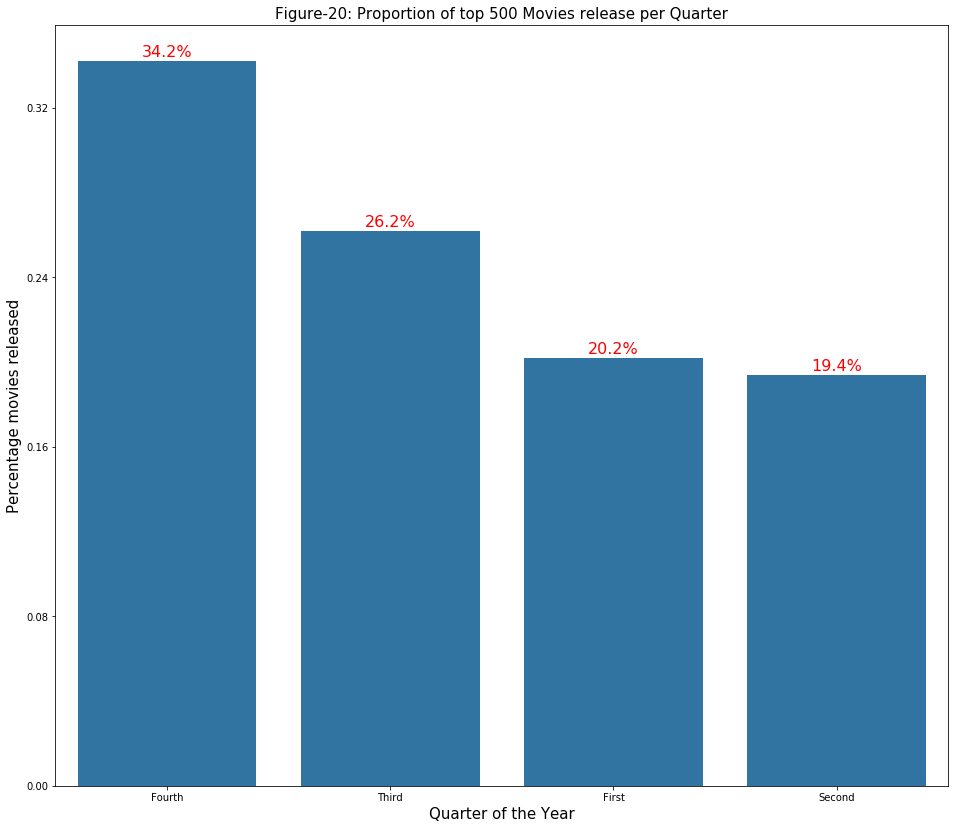

In [72]:
## Plot the percentage of movie released per quarter
plt.figure(figsize = [16, 14])
base_color = sns.color_palette()[0]
n_points =  df_top500.quarter.value_counts().sum()
max_count = df_top500.quarter.value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_top500, x = 'quarter', color = base_color, order = df_top500_quarter_percentage.index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("Quarter of the Year",fontsize=15)
plt.ylabel("Percentage movies released",fontsize=15)
plt.title('Figure-20: Proportion of top 500 Movies release per Quarter',fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# add annotations
cat_counts = df_top500['quarter'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

### Conclusion 7-B) 

**In contrast to the total movie dataset, the month of December has the highest percentage of movies combining all the years, which is 14.4% of the top 500 movies. Also, when it comes to the number of movies release per quarter, quarter-4 (from Oct-Dec) has the largest amount of movie released  (Figure-20).**




### 7-C) Which decade has most movies among the top 500 movies were released?
               

### Note: Like previous instance, the  top 500 movies will now be divided into categories based on the release date :

1. 1960-1969: 60s

2. 1970-1979: 70s

3. 1980-1989: 80s

4. 1990-1999: 90s

5. 2000-2009: 2010s

6. 2010-2019: 2020s

In [73]:
# Creates bin edges for each decade
bin_edges = [1959, 1969, 1979, 1989, 1999, 2009, 2019 ]

In [74]:
# Creates bin names based on the year of release
bin_names = ['60s', '70s', '80s', '90s', '2000s', '2010s' ]

In [75]:
# Creates decade_levels column based on the year of release
df_top500['decade'] = pd.cut(df_movies['release_year'], bin_edges, labels = bin_names)

In [76]:
# view to check if the decade level has appeared
df_top500.head(3)

,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,profit,decade,Month,Month-str,quarter
3894,0.0,0.0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,cinema|nouvelle vague|hindi cinema|cinema novo...,900,Documentary,NaN,2011-09-03,9.2,2011,0.0,2010s,9,Sep,Third
538,0.0,0.0,The Mask You Live In,NaN,Jennifer Siebel Newsom,feminism|sexism|young boy|gender roles|misogyny,88,Documentary,NaN,2015-01-01,8.9,2015,0.0,2010s,1,Jan,First
1200,0.0,0.0,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,Carl Tibbetts,artificial intelligence|confession|technology|...,74,Drama|Horror|Mystery|Science Fiction|Thriller,NaN,2014-12-16,8.8,2014,0.0,2010s,12,Dec,Fourth


In [77]:
# view to check if the decade level has appeared
df_top500.tail(3)

,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,profit,decade,Month,Month-str,quarter
1806,0.0,1.896244,It Might Get Loud,Jimmy Page|The Edge|Jack White|Link Wray,Davis Guggenheim,claim in title|rock documentary|soda bottle|st...,97,Documentary|Music,NaN,2009-08-14,7.4,2009,1.896244,2000s,8,Aug,Third
1923,250.0,954.305868,Harry Potter and the Deathly Hallows: Part 1,Daniel Radcliffe|Emma Watson|Rupert Grint|Ralp...,David Yates,corruption|isolation|radio|magic|teleportation,146,Adventure|Fantasy|Family,Warner Bros.|Heyday Films,2010-10-17,7.4,2010,704.305868,2010s,10,Oct,Fourth
1926,165.0,494.878759,How to Train Your Dragon,Jay Baruchel|Gerard Butler|Craig Ferguson|Amer...,Dean DeBlois|Chris Sanders,flying|blacksmith|arena|island|night,98,Fantasy|Adventure|Animation|Family,DreamWorks Animation|Vertigo Entertainment|Mad...,2010-03-05,7.4,2010,329.878759,2010s,3,Mar,First


In [78]:
# Count the total number of movies 
df_top500['decade'].value_counts()

2010s    246
2000s    116
90s       58
80s       34
70s       31
60s       15
Name: decade, dtype: int64

In [79]:
# Count the total number of movies- should return 500
df_top500['decade'].value_counts().sum()

500

In [80]:
# Percentage of movies released per decade
df_top500_percentage_decade = df_top500['decade'].value_counts()/df_top500['decade'].value_counts().sum()*100

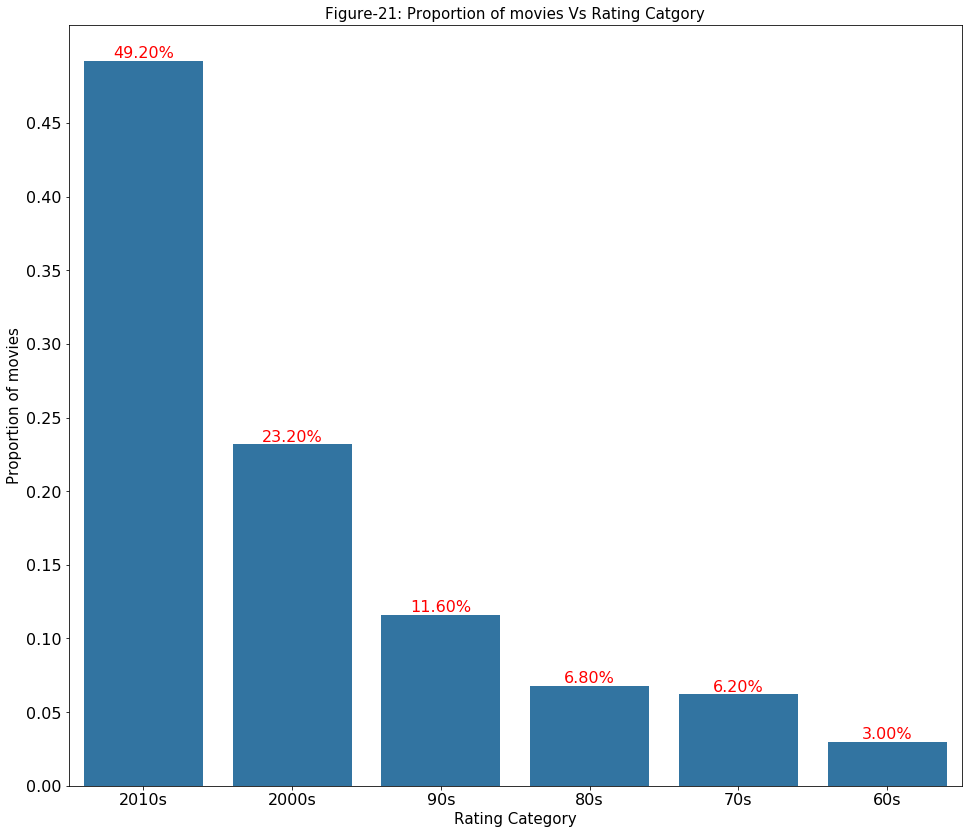

In [81]:
# Plot the percentage of released each decade
plt.figure(figsize = [16, 14])
n_points =  df_top500['decade'].value_counts().sum()
max_count = df_top500['decade'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_top500, x = 'decade', color = base_color, order= df_top500['decade'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('Proportion of movies', fontsize=15)
plt.xlabel('Rating Category', fontsize=15)
plt.title('Figure-21: Proportion of movies Vs Rating Catgory',fontsize=15)

# add annotations
cat_counts = df_top500['decade'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

### Conclusion 7-C)

**From Figure-21 it can be seen that the 2010s has the largest perentage of top 500 movies released which is almost half of the top 500 movies.**

### 7-D) Which cast appears the largest number of times in most of the top 500 movies were released?
              

In [82]:
# frquent 10 movie cast
top10_cast = frequent_names(df_top500['cast'])

In [83]:
top10_cast 

[('Tom Hanks', 9),
 ('Robert De Niro', 7),
 ('Brad Pitt', 6),
 ('Michael Caine', 6),
 ('Samuel L. Jackson', 6),
 ('John Hurt', 6),
 ('Mark Hamill', 6),
 ('Harrison Ford', 6),
 ('Leonardo DiCaprio', 6),
 ('Ian McKellen', 6)]

In [84]:
#Find Louis Tom Hanks movies
df_movies[df_movies['cast'].str.contains("Tom Hanks")==True].original_title.count()

46

In [85]:
#Find Louis Tom Hanks in top 500 movies
df_top500[df_top500['cast'].str.contains("Tom Hanks")==True].original_title

4179            Forrest Gump
2414          The Green Mile
5487        Captain Phillips
8974     Saving Private Ryan
3918     Catch Me If You Can
1930             Toy Story 3
4605         Partysaurus Rex
8068               Toy Story
10228           Philadelphia
Name: original_title, dtype: object

In [86]:
# Mean of the Tom Hanks movies
df_movies[df_movies['cast'].str.contains("Tom Hanks")==True].vote_average.mean()

6.5826086956521745

In [87]:
# Mean of the Robert De Niro movies
df_movies[df_movies['cast'].str.contains("Robert De Niro")==True].vote_average.mean()

6.330555555555555

### Conclusion 7-D) 

**1) Out of the 46 movies of Tom Hanks in the dataset, 09 are in the top 500 are in the top 500 list. Tom Hanks's movies have average rarting of 6.58.**

**2) Out of the 72 movies of Robert De Niro, 7 made it to the top 500 list. Robert De Niro's movies has an vote_average of 6.33.**

### 7- E) Of the top 500 movies who has produced the largest number of movies?
             

In [88]:
# 5 most frequent producers for top 500 movies
top10_producers = frequent_names(df_top500['director'])

In [89]:
# 10 most frequent producers for top 500 movies
top10_producers 

[('Martin Scorsese', 9),
 ('Quentin Tarantino', 8),
 ('Christopher Nolan', 6),
 ('Steven Spielberg', 5),
 ('Shannon Hartman', 5),
 ('Louis C.K.', 5),
 ('Stanley Kubrick', 5),
 ('Wes Anderson', 4),
 ('Peter Jackson', 4),
 ('Ridley Scott', 4)]

In [90]:
df_top10_producers = pd.DataFrame(top10_producers,columns = ['director', 'no_of_movies_in_top500'])

In [91]:
df_top10_producers 

,director,no_of_movies_in_top500
0,Martin Scorsese,9
1,Quentin Tarantino,8
2,Christopher Nolan,6
3,Steven Spielberg,5
4,Shannon Hartman,5
5,Louis C.K.,5
6,Stanley Kubrick,5
7,Wes Anderson,4
8,Peter Jackson,4
9,Ridley Scott,4


In [92]:
# Martin Scorsese's movies
df_top500[df_top500['director'].str.contains("Martin Scorsese")==True].original_title

8221     A Personal Journey with Martin Scorsese Throug...
3835         George Harrison: Living in the Material World
9979                                            Goodfellas
10817                                       The Last Waltz
5428                               The Wolf of Wall Street
10173                                          Taxi Driver
6563                                          The Departed
1927                                        Shutter Island
8083                                                Casino
Name: original_title, dtype: object

In [93]:
# Total number of movies by Martin Scorsese
df_movies[df_movies['director'].str.contains("Martin Scorsese")==True].original_title.count()

31

In [94]:
# Average rating for the Martin Scorsese's movies
df_movies[df_movies['director'].str.contains("Martin Scorsese")==True].vote_average.mean()

6.970967741935484

In [95]:
# Min rating for the Quentin Tarantino movies
df_movies[df_movies['director'].str.contains("Quentin Tarantino")==True].vote_average.mean()

7.207142857142858

In [96]:
# Max rating for the Martin Scorsese's movies
df_movies[df_movies['director'].str.contains("Martin Scorsese")==True].vote_average.max()

8.5

In [97]:
# Max Average rating for the Quentin Tarantino movies
df_movies[df_movies['director'].str.contains("Quentin Tarantino")==True].vote_average.max()

8.1

In [98]:
# Min Average rating for the Martin Scorsese movies
df_movies[df_movies['director'].str.contains("Martin Scorsese")==True].vote_average.min()

5.3

In [99]:
# Min Average rating for the Quentin Tarantino movies
df_movies[df_movies['director'].str.contains("Quentin Tarantino")==True].vote_average.min()

5.1

### Conclusion 7-E)

**1) Martin Scorsese has produced a total of 31 movies of which 9 made it to the top 500 which is  the largest number of movies- closely followed by Quentin Tarantino with 8 movies in the top 500 list.**

**2) Martin Scorsese's average rating is 6.97,  maximum rating is 8.5, and minimum is 5.1.**

### 7- F) Of the top 500 movies, which single month of a particular decade has the highest amount of movie released?

In [100]:
df_top500.query('runtime==900')

,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,profit,decade,Month,Month-str,quarter
3894,0.0,0.0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,cinema|nouvelle vague|hindi cinema|cinema novo...,900,Documentary,NaN,2011-09-03,9.2,2011,0.0,2010s,9,Sep,Third


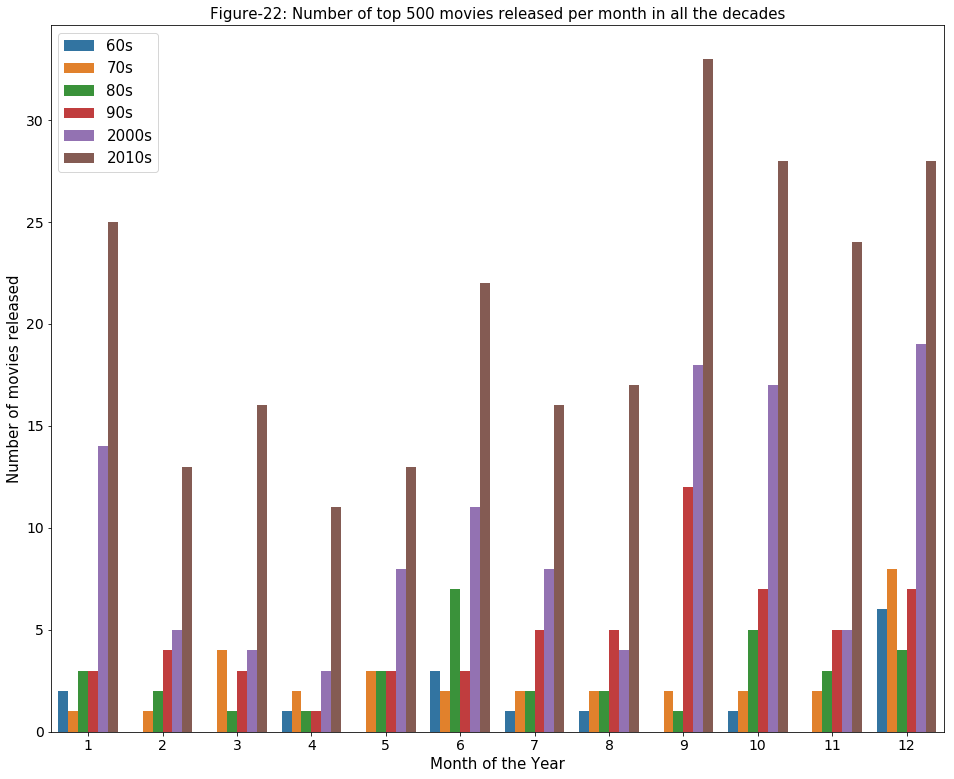

In [101]:
# TOp 500 movie data: Highest Number of movie released in a month
plt.figure(figsize = [16, 13])
sns.countplot(data = df_top500, x = 'Month', hue = 'decade')
plt.xlabel("Month of the Year",fontsize=15)
plt.ylabel("Number of movies released",fontsize=15)
plt.title("Figure-22: Number of top 500 movies released per month in all the decades",fontsize=15)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.legend(loc=2,prop={'size':15})

In [102]:
df_total_Sep_2010s = df_top500.query('Month == 9').query('decade == "2010s"').count().original_title
print("From top 500 the number of movies released in Sep 2010s is: {}".format(df_total_Sep_2010s))

df_total_Sep_2000s = df_top500.query('Month == 9').query('decade == "2000s"').count().original_title
print("From top 500 the number of movies released in Sep 2000s is: {} ".format(df_total_Sep_2000s))


df_total_Sep_1990s = df_top500.query('Month == 9').query('decade == "1990s"').count().original_title
print("From top 500 the number of movies released in Sep 1990s is: {} ".format(df_total_Sep_1990s))


df_total_Sep_1980s = df_top500.query('Month == 9').query('decade == "1980s"').count().original_title
print("From top 500 the number of movies released in Sep 1980s is: {} ".format(df_total_Sep_1980s))

df_total_Sep_1970s = df_top500.query('Month == 9').query('decade == "1970s"').count().original_title
print("From top 500 the number of movies released in Sep 1970s is: {} ".format(df_total_Sep_1970s))

df_total_Sep_1960s = df_top500.query('Month == 9').query('decade == "1960s"').count().original_title
print("From top 500 the number of movies released in Sep 1960s is: {} ".format(df_total_Sep_1960s))

From top 500 the number of movies released in Sep 2010s is: 33
From top 500 the number of movies released in Sep 2000s is: 18 
From top 500 the number of movies released in Sep 1990s is: 0 
From top 500 the number of movies released in Sep 1980s is: 0 
From top 500 the number of movies released in Sep 1970s is: 0 
From top 500 the number of movies released in Sep 1960s is: 0 


### 7- F) Conclusion

**Of the top 500 movies, most were released during 2010-2015 in the month of Sep (Figure-22). The largest number of 33 movies were released in Sep 2010.**


### 8) Vizualizing Vote_average, Runtime and Rating of the top 500 movies

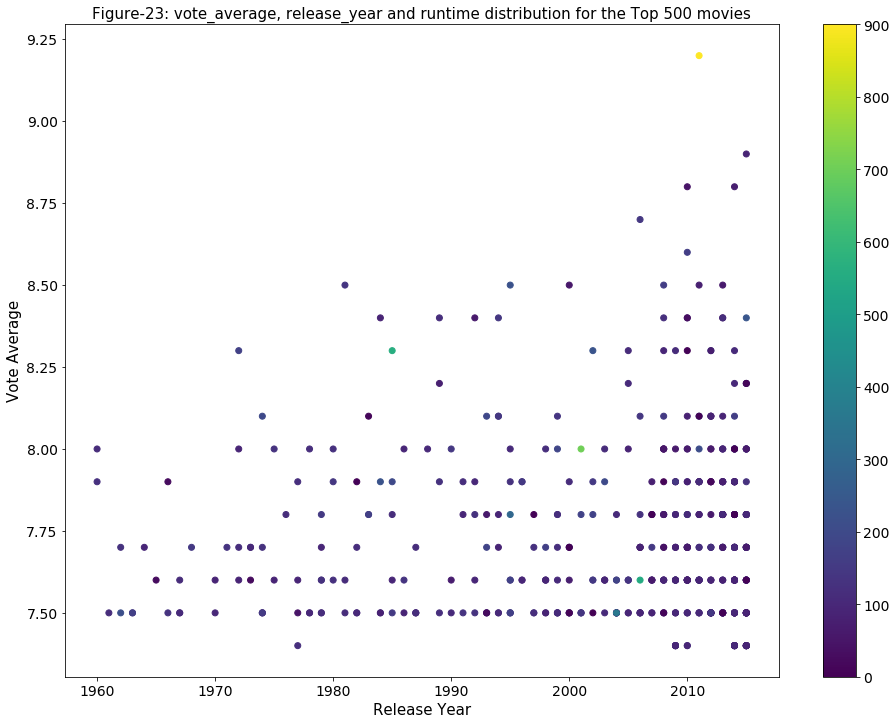

In [103]:
# plt vote_average, release_year and runtime distribution for the Top 500 movies
plt.figure(figsize = [16, 12])
plt.scatter(data = df_top500, x = 'release_year', y = 'vote_average', c = 'runtime')
plt.colorbar()
plt.title("Figure-23: vote_average, release_year and runtime distribution for the Top 500 movies",fontsize=15)
plt.xlabel('Release Year',fontsize=15)
plt.ylabel('Vote Average',fontsize=15)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

### Note: 
**From Figure-23 it can be seen that most of the high rating movies are concentrated during 2010-2015. Also, the colour hue helps to visualize the long runtime movies. 2011 has the movies with longest runtime and vote_average marked by the colour yellow on the top.**

In [104]:
#runtime distribution of top 500 movies
df_top500.describe().runtime

count    500.000000
mean     110.916000
std       73.272961
min        0.000000
25%       88.000000
50%      104.000000
75%      130.000000
max      900.000000
Name: runtime, dtype: float64

### Note: Minimum runtime here is 0 which does not make sense. 

In [105]:
# taking the movies with nonzero runtime
df_top500_nonzero_runtime = df_top500[df_top500['runtime']!=0]

In [106]:
# movies with nonzero runtime
df_top500_nonzero_runtime.head(2)

,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,profit,decade,Month,Month-str,quarter
3894,0.0,0.0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,cinema|nouvelle vague|hindi cinema|cinema novo...,900,Documentary,NaN,2011-09-03,9.2,2011,0.0,2010s,9,Sep,Third
538,0.0,0.0,The Mask You Live In,NaN,Jennifer Siebel Newsom,feminism|sexism|young boy|gender roles|misogyny,88,Documentary,NaN,2015-01-01,8.9,2015,0.0,2010s,1,Jan,First


In [107]:
# summary of the nonzero runtime movies
df_top500_nonzero_runtime.describe().runtime

count    499.000000
mean     111.138277
std       73.177556
min        2.000000
25%       88.000000
50%      104.000000
75%      130.000000
max      900.000000
Name: runtime, dtype: float64

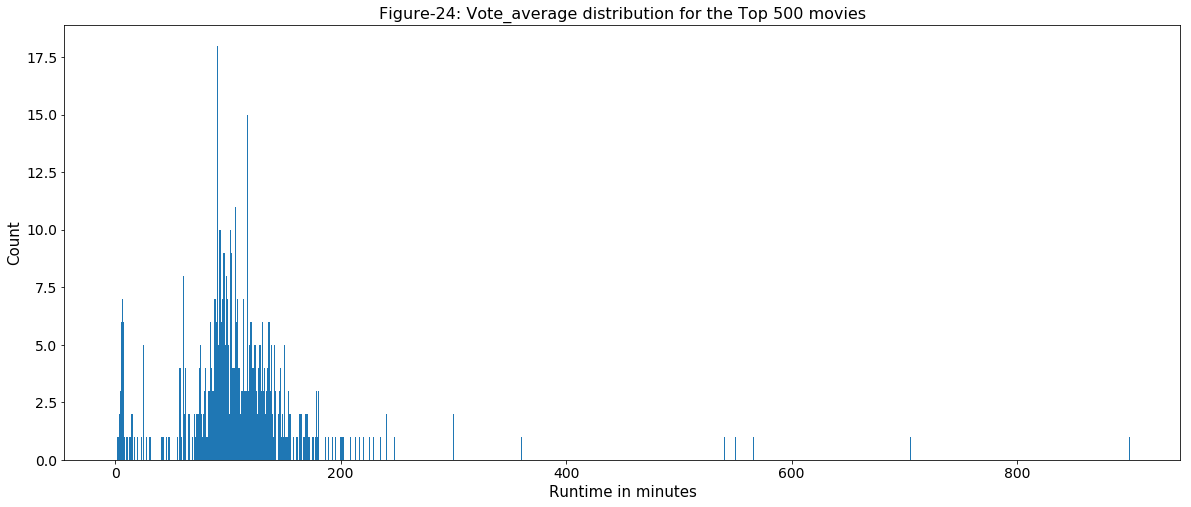

In [108]:
## Plot runtime distribution of top 500 movies
plt.figure(figsize = [20, 8])
bin_edges = np.arange(0, df_top500_nonzero_runtime['runtime'].max()+1,1)
plt.hist(data = df_top500_nonzero_runtime, x = 'runtime', bins = bin_edges)
plt.title("Figure-24: Vote_average distribution for the Top 500 movies",fontsize=16)
plt.xlabel('Runtime in minutes',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

### Note: 
**1) 75% of the top 500 movies have runtime <= 130 minutes as can be seen from Figure-24. The curve has dense spikes at the left of 200 minutes mark on the x-axis.**

**2)The  lowest runtime is 02 minutes, and the highest runtime is 900 minutes (can be seen from the rightmost spike) for the top 500 movies.** 


In [109]:
#runtime distribution of top 500 movies
df_top500.describe().vote_average

count    500.000000
mean       7.737200
std        0.275259
min        7.400000
25%        7.500000
50%        7.700000
75%        7.900000
max        9.200000
Name: vote_average, dtype: float64

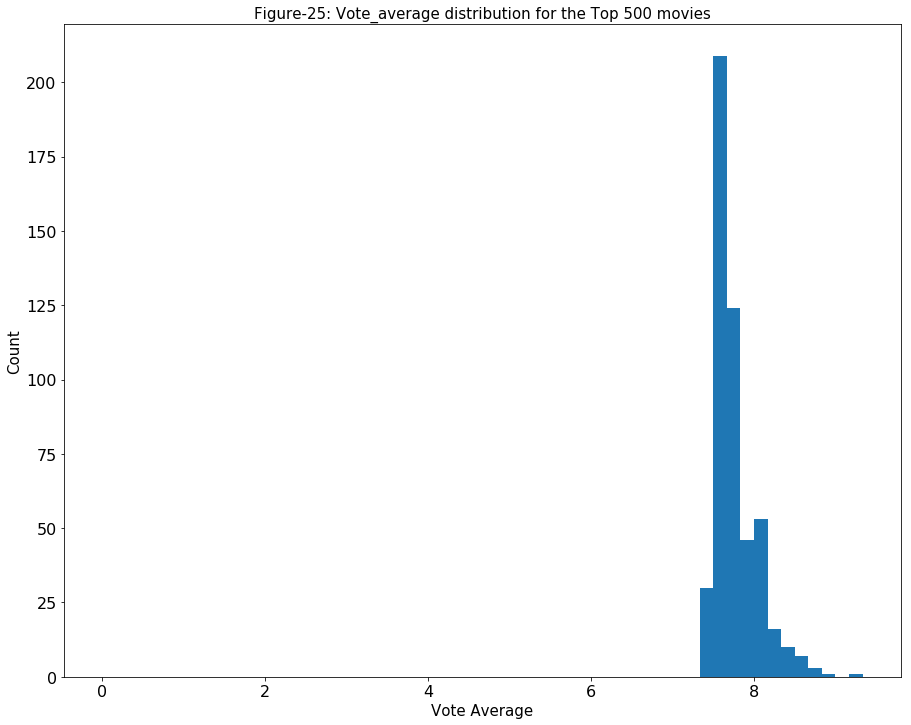

In [110]:
## Plot vote_average distribution of top 500 movies
plt.figure(figsize = [15, 12])
bin_edges = np.arange(0, df_top500['vote_average'].max()+1/6, 1/6)
plt.hist(data = df_top500, x = 'vote_average', bins = bin_edges )
plt.title("Figure-25: Vote_average distribution for the Top 500 movies",fontsize=15)
plt.xlabel('Vote Average',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)


### Note:
**1) Top 500 movies have the lowest vote_average of 7.4 and the highest 9.2 as can be seen from Figure-25.**

**2) 75% movies have vote average from 7.4-7.9.**

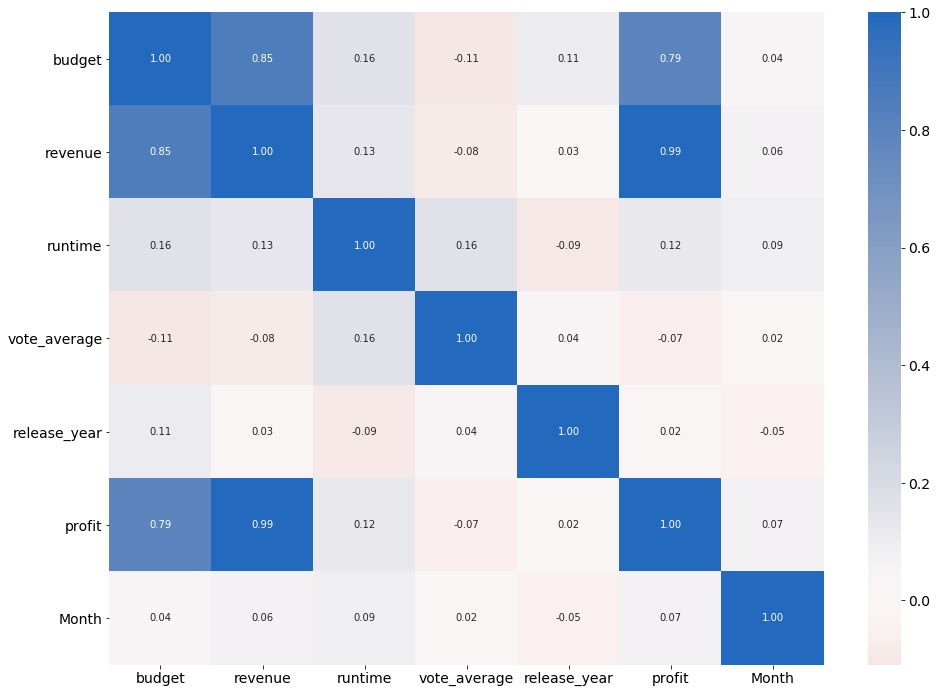

In [111]:
# correlation matrix for top 500 movies
plt.figure(figsize = [16, 12])
sns.heatmap(df_top500.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

### Note:
**From the correlation matrix it can be seen that: a) budget vs profit, b) budget vs revenue and c) revenue vs profit has the highest correlation like the previous instance in part-2 for all the movies.**


### Ref:
    
1. https://en.wikipedia.org/wiki/List_of_highest-grossing_films